In [3]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import pylab as pl
matplotlib.use('qt4agg')  # Can also use 'tkagg' or 'webagg'

import statsmodels.api as sm

import os
import json
s = json.load(open('../fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import sys
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


# DATA: direct load from the statsmodels library
http://statsmodels.sourceforge.net/devel/datasets/generated/macrodata.html

In [4]:
data = sm.datasets.macrodata.load_pandas().data
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data, figsize=(25,25));

**A time series is stationary if its MEAN and its VARIANCE are constant *globally***

**i.e. there can be local variations, but the mean over a reasonably large portion of the time series (several datapoints) will not change at large distances in the time series**

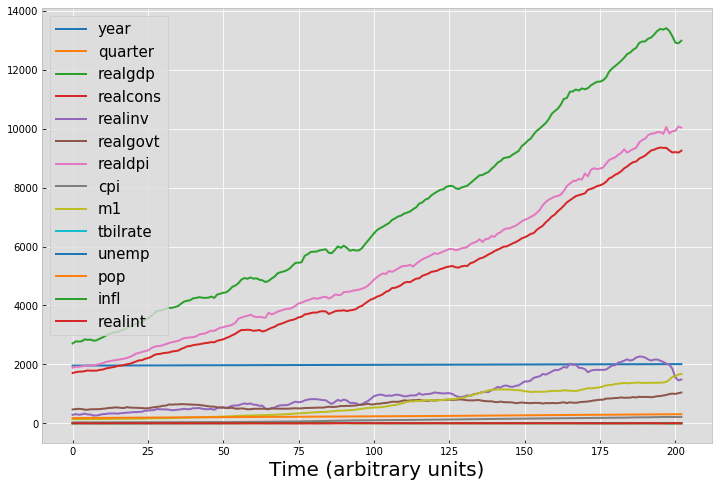

In [6]:
data.plot(figsize=(12,8))
pl.xlabel("Time (arbitrary units)", fontsize=20)
pl.legend(fontsize=15);


     year  unemp
0  1959.0    5.8
1  1959.0    5.1
2  1959.0    5.3
3  1959.0    5.6
4  1960.0    5.2


,year,unemp
count,203.000000,203.000000
mean,1983.876847,5.884729
std,14.686817,1.458574
min,1959.000000,3.400000
25%,1971.000000,4.900000
50%,1984.000000,5.700000
75%,1996.500000,6.800000
max,2009.000000,10.700000


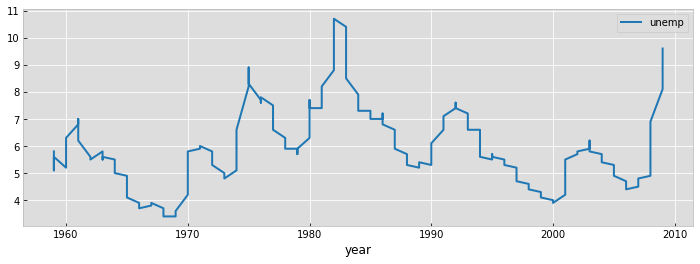

In [7]:
data = sm.datasets.macrodata.load_pandas().data
datadiff = data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()

In [12]:
#create a better time axis
data["year"] = data.year + data.quarter * 0.25

      year  unemp
0  1959.25    5.8
1  1959.50    5.1
2  1959.75    5.3
3  1960.00    5.6
4  1960.25    5.2


,year,unemp
count,203.000000,203.000000
mean,1984.500000,5.884729
std,14.686303,1.458574
min,1959.250000,3.400000
25%,1971.875000,4.900000
50%,1984.500000,5.700000
75%,1997.125000,6.800000
max,2009.750000,10.700000


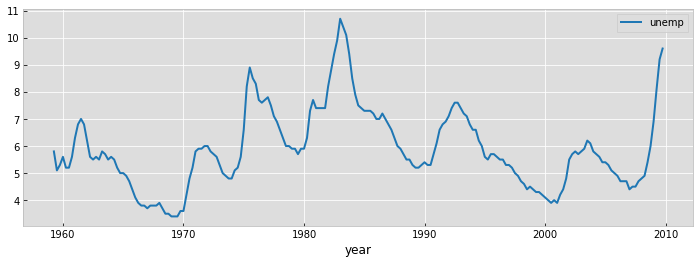

In [13]:
datadiff = data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()


## NON stationary time series
Real Gross Domestic Product (real GDP) is a macroeconomic measure of the value of economic output adjusted for price changes (i.e., inflation or deflation). This adjustment transforms the money-value measure, nominal GDP, into an index for quantity of total output.

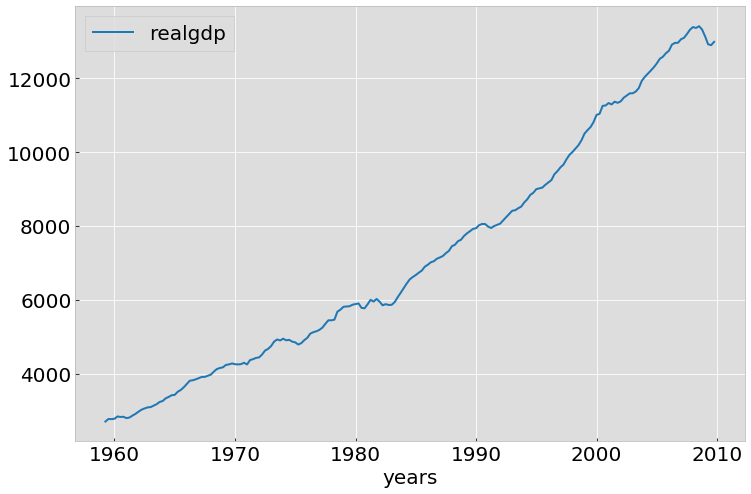

In [11]:
ax = data.plot('year','realgdp', figsize=(12,8), fontsize=20);
ax.set_xlabel("years", fontsize=20)
ax.legend(fontsize=20);

### use a ROLLING MEAN to visually assess stationarity

In [13]:
pd.rolling_mean?

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """


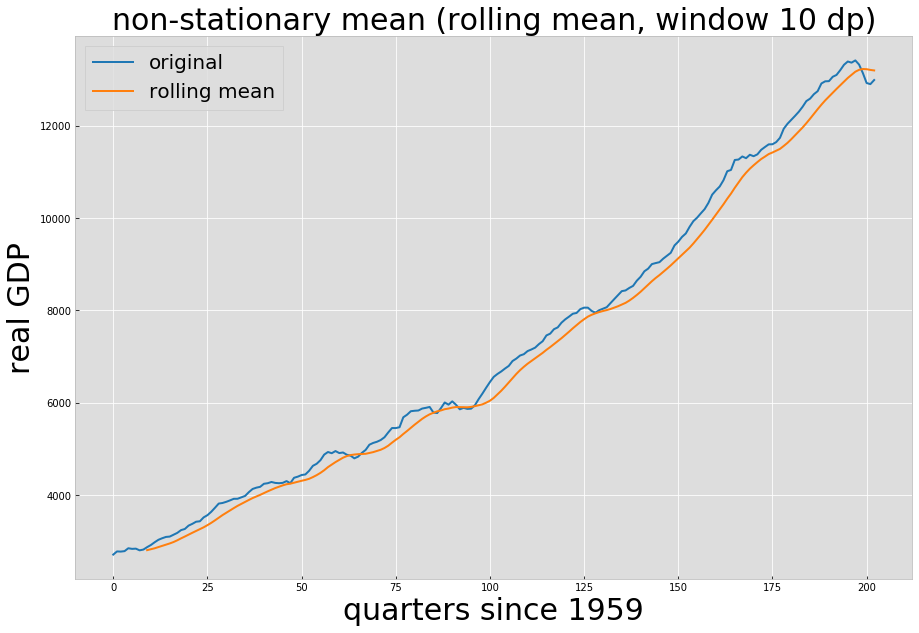

In [15]:
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111)

#rolling mean, window 10
realdgp_rmean = pd.rolling_mean(data['realgdp'], 10)

ax.plot(np.arange(len(data["realgdp"])), data["realgdp"], label="original")
ax.plot(np.arange(len(data["realgdp"])), realdgp_rmean, label="rolling mean")
ax.set_title("non-stationary mean (rolling mean, window 10 dp)", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)
pl.legend(fontsize=20)


//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
  """
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).std()
  app.launch_new_instance()
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


gdp
 0    2710.349
1    2778.801
2    2775.488
3    2785.204
4    2847.699
Name: realgdp, dtype: float64 
 198    13324.600
199    13141.920
200    12925.410
201    12901.504
202    12990.341
Name: realgdp, dtype: float64
rolling mean of gdp
 9     2806.4838
10    2827.2908
11    2847.1937
12    2872.7690
13    2900.7195
Name: realgdp, dtype: float64 
 198    13211.2024
199    13229.1482
200    13225.0976
201    13209.1801
202    13198.2241
Name: realgdp, dtype: float64


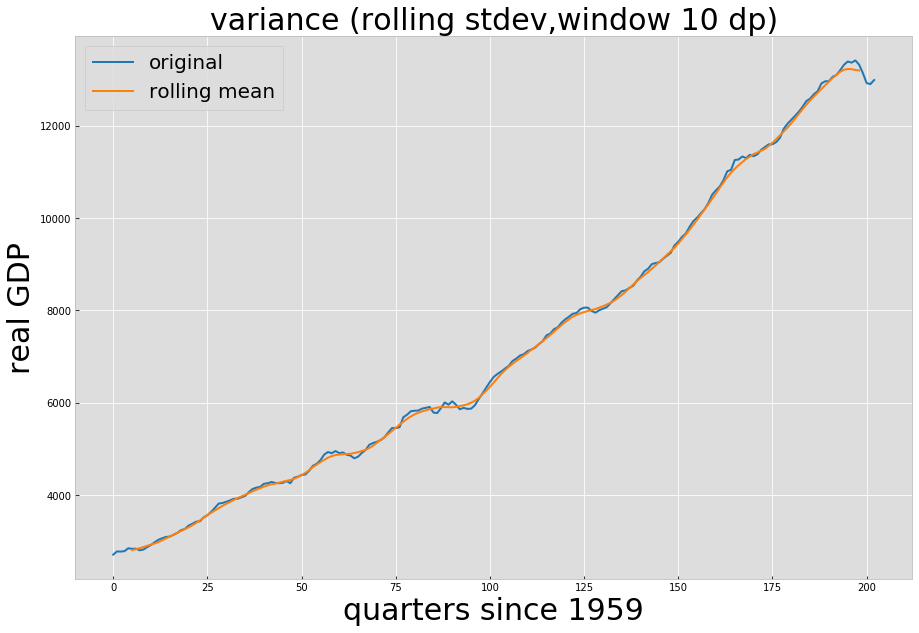

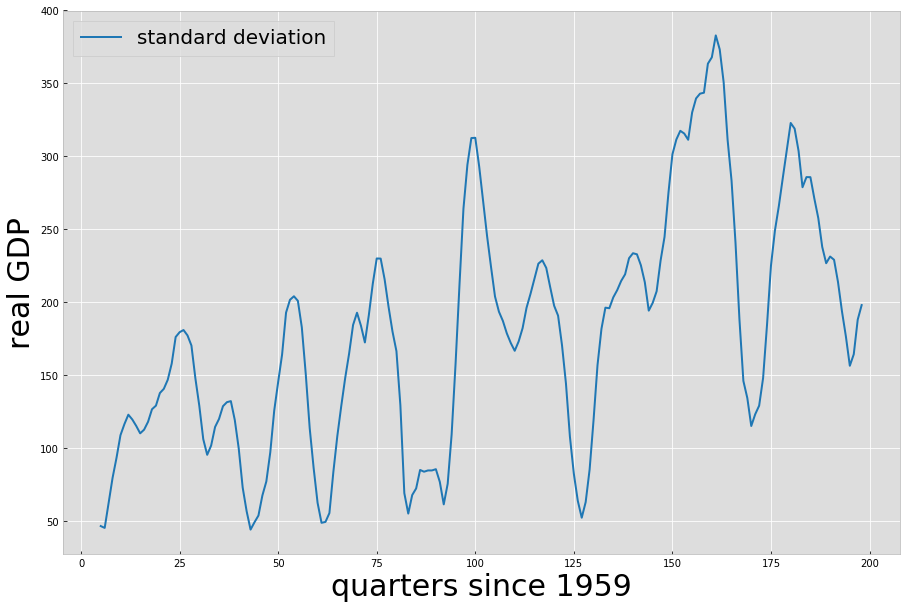

In [17]:
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111)

#rolling mean, window 10
realdgp_rmean = pd.rolling_mean(data['realgdp'], 10, center=True)

ax.plot(np.arange(len(data["realgdp"])), data["realgdp"], label="original")
ax.plot(np.arange(len(data["realgdp"])), realdgp_rmean, label="rolling mean")
ax.set_title("non-stationary mean (rolling mean, window 10 dp)", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)
pl.legend(fontsize=20)

#rolling standard deviation, window 10
pl.figure()
pd.rolling_std(data['realgdp'], 10, center=True).plot(figsize=(15,10), 
                                         label="standard deviation")
ax.set_title("variance (rolling stdev,window 10 dp)", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)
pl.legend(fontsize=20)

print ("gdp\n", 
       data['realgdp'].dropna().head(), "\n", 
       data['realgdp'].dropna().tail())

print ("rolling mean of gdp\n", 
       pd.rolling_mean(data['realgdp'], 10).dropna().head(), "\n", 
       pd.rolling_mean(data['realgdp'], 10).dropna().tail())



## differencing the time series to remove the long term behavior (essentially taking the derivative)

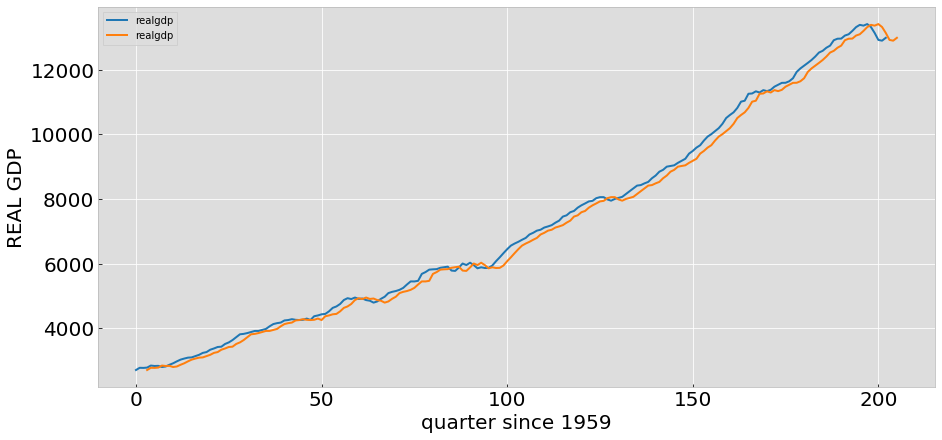

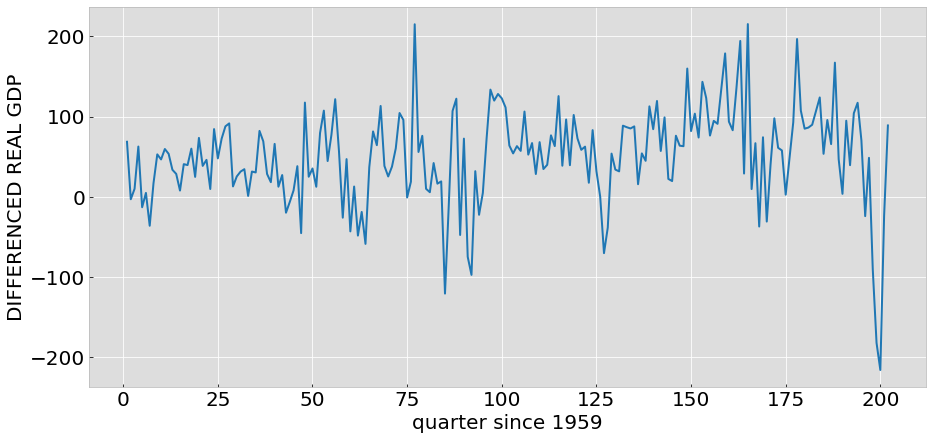

In [18]:

ax1 = data[['realgdp']].plot(figsize=(15,7), fontsize=20)
ax1 = data[['realgdp']].plot(x=np.arange(len(data)) + 3, ax=ax1)
ax1.set_xlabel('quarter since 1959', fontsize=20)
ax1.set_ylabel('REAL GDP', fontsize=20)
 
pl.figure()
ax2 = data.realgdp.diff(periods=1).plot(figsize=(15,7), fontsize=20)
ax2.set_xlabel('quarter since 1959', fontsize=20)
ax2.set_ylabel('DIFFERENCED REAL GDP', fontsize=20);


## NON stationary time series, stationary in mean

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  after removing the cwd from sys.path.


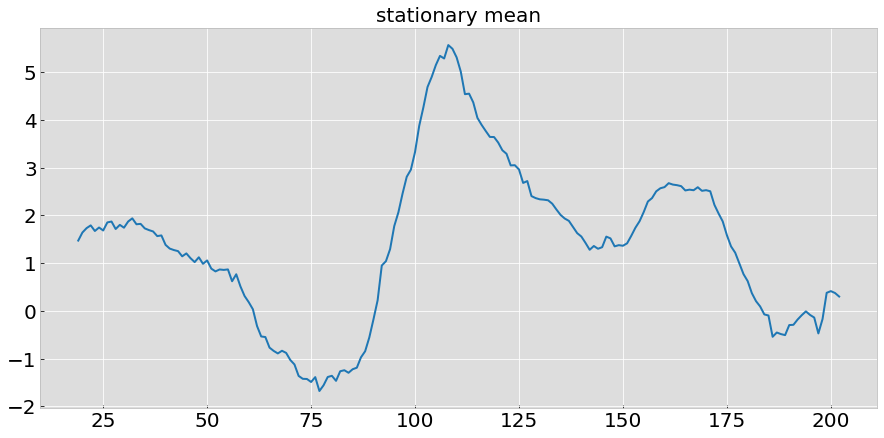

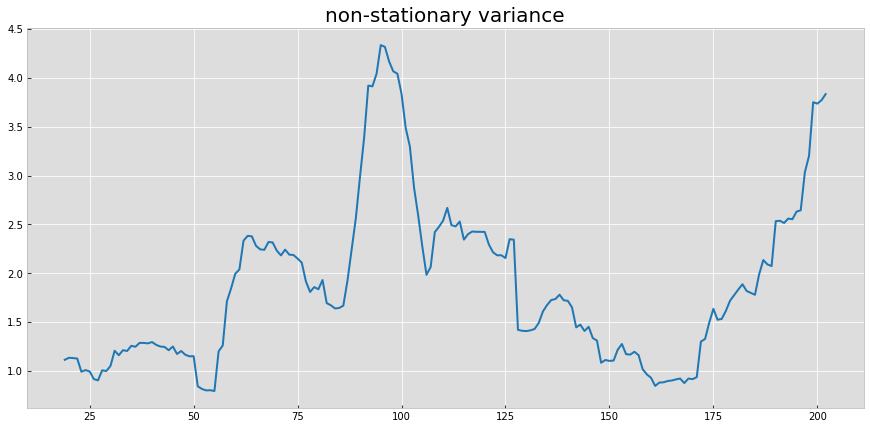

In [21]:
ax = pd.rolling_mean(data['realint'], 20).plot(figsize=(15,7), fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(data['realint'], 20).plot(figsize=(15,7))
ax.set_title("non-stationary variance", fontsize=20);

# Formal tests to see if these time series are stationary e.g.: ADFuller test
[https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test]
Null hypothsis: there is a "unit root": i.e. the series is not stationary [http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html]


sm.tsa.adfuller?:
The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, 
with the alternative that there is no unit root. If the pvalue is above a critical size, 
then we cannot reject that there is a unit root. 
No unit root generally means stationarity

Stationarity tests allow verifying whether a series is stationary or not. There are two different approaches: some tests consider as null hypothesis H0 that the series is stationary (KPSS test, Leybourne and McCabe test), and for other tests, on the opposite, the null hypothesis is on the contrary that the series is not stationary (Dickey-Fuller test, augmented Dickey-Fuller test, Phillips-Perron test, DF-GLS test.


([ref](https://www.xlstat.com/en/solutions/features/unit-root-and-stationarity-tests))


//anaconda/envs/GEOP/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


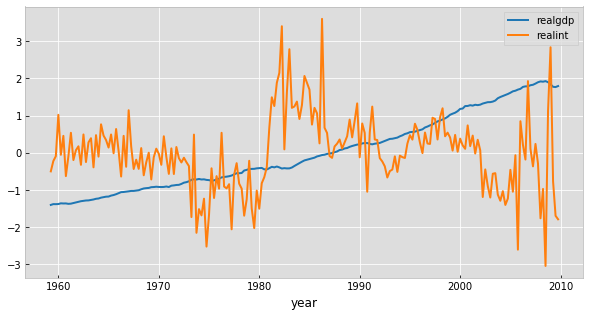

In [22]:
data2 = (data - data.mean()) / data.std()
data2["year"] = data.year
data2.plot(figsize=(10,5), x="year", y=["realgdp", "realint"])
#data, data2

In [24]:
sm.tsa.adfuller?

In [23]:
print ("REALGDB and REALINT stationatiry, AD Fuller test\n\n")
print ("realgdp {0:.2f}".format(sm.tsa.adfuller(data['realgdp'])[1]), 
       sm.tsa.adfuller(data['realgdp']))

print ("realint {0:.2f}".format(sm.tsa.adfuller(data['realint'])[1]), 
       sm.tsa.adfuller(data['realint']))



REALGDB and REALINT stationatiry, AD Fuller test


realgdp 1.00 (1.7504627967647086, 0.9982455372335032, 12, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 2034.517123668382)
realint 0.01 (-3.533732591186036, 0.007161872494651703, 2, 200, {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}, 827.24666293306)


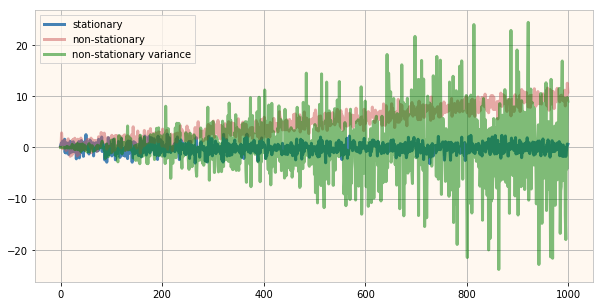

In [50]:
pl.figure(figsize=(10,5))
st = np.random.randn(1000)
nonst = np.random.randn(1000) + np.arange(0., 10, 0.01)
nonstvar = np.random.randn(1000) * np.arange(0., 10, 0.01)
pl.plot(range(1000), st, label="stationary")
pl.plot(range(1000), nonst, label="non-stationary", alpha=0.5)
pl.plot(range(1000), nonstvar, label="non-stationary variance", alpha=0.5)
pl.legend();

In [51]:
print ("SYNTHETIC STATIONARY DATA\n\n")
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(st)[1]),
       sm.tsa.adfuller(st) )
print ("synthetic nonstationary data {0:.2f}".format(sm.tsa.adfuller(nonst)[1]),
       sm.tsa.adfuller(nonst) )
print ("synthetic nonstationary variance data {0:.2f}".format(sm.tsa.adfuller(nonstvar)[1]),
       sm.tsa.adfuller(nonstvar) )

SYNTHETIC STATIONARY DATA


synthetic stationary data 0.00 (-32.92374244920898, 0.0, 0, 999, {'10%': -2.568312754566378, '5%': -2.864437475834273, '1%': -3.4369127451400474}, 2734.8442705387533)
synthetic nonstationary data 0.93 (-0.27420067221059735, 0.92907964255955333, 20, 979, {'10%': -2.5683443301882956, '5%': -2.8644967585264784, '1%': -3.4370471695043037}, 2801.6206110461972)
synthetic nonstationary variance data 0.00 (-10.831716972229572, 1.7014785963788732e-19, 5, 994, {'10%': -2.5683205291305176, '5%': -2.8644520725172873, '1%': -3.4369458427754398}, 6182.2200257117129)


In [52]:
print (sm.datasets.cancer.NOTE)

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [53]:
cdata = sm.datasets.cancer.load_pandas().data

In [54]:
cdata.describe()

,cancer,population
count,301.000000,301.000000
mean,39.857143,11288.056478
std,50.977801,13780.010088
min,0.000000,445.000000
25%,11.000000,2935.000000
50%,22.000000,6445.000000
75%,48.000000,13989.000000
max,360.000000,88456.000000


In [55]:
cdata.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114bc6710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114d22940>]], dtype=object)

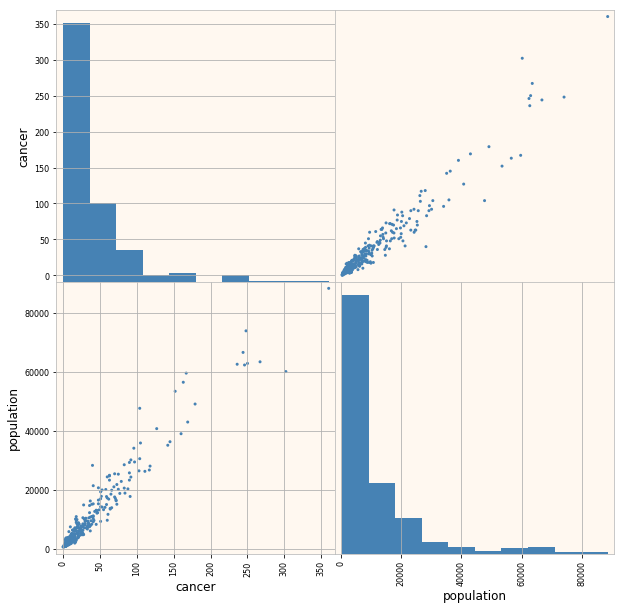

In [56]:
pd.scatter_matrix(cdata, figsize(10,10))

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()



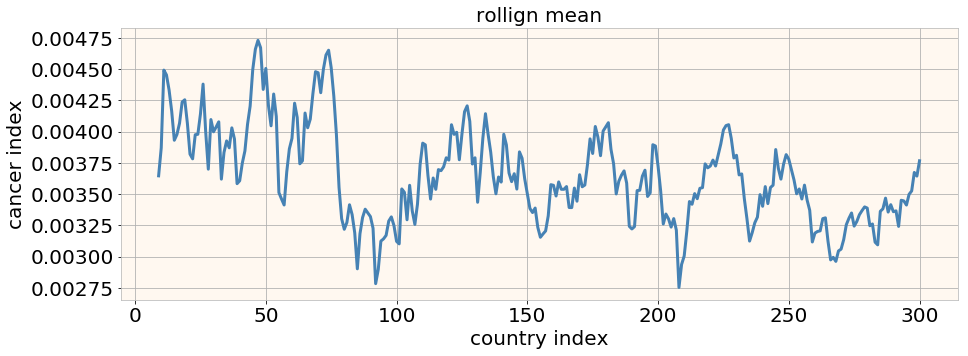

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/test_fiona/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()



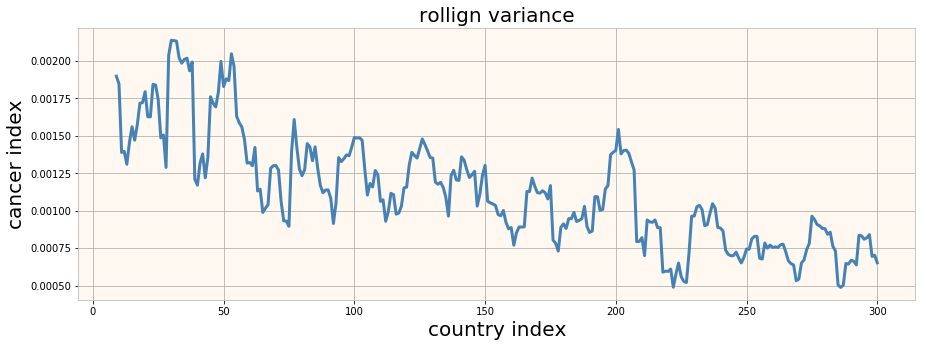

In [66]:
ax = pd.rolling_mean(cdata['cancer'] / cdata['population'], 
                     10).plot(figsize=(15,5), 
                                                                   fontsize=20)
ax.set_title("rollign mean", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)
pl.show()
ax = pd.rolling_std(cdata['cancer'] / cdata['population'], 
                    10).plot(figsize=(15,5))

ax.set_title("rollign variance", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)
pl.show()


In [24]:
print ("AD Fuller test on cancer rate by country")
sm.tsa.adfuller (cdata['cancer'] / cdata['population'])

AD Fuller test on cancer rate by country


(-3.2124663237520563,
 0.019274324926640333,
 16,
 284,
 {'1%': -3.4535872903895797,
  '10%': -2.5722217283277127,
  '5%': -2.8717713552112119},
 -3030.2409529605561)